# **ADVERTISEMENT ANALYSIS**

Analisis ini bertujuan untuk melihat seberapa efektif promosi iklan melalui TV, radio dan newspaper terhadap Sales (Penjualan).
Kita akan mencoba memprediksi promosi iklan menggunakan :
1.   Simple Linier Regression
2.   Polynomial Linear Regression



### Import the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PORTOFOLIO/CSV/Sales Analytics/advertising-date.csv')
df.head()

,Date,TV,Radio,Newspaper,Sales
0,1/1/2015,230.1,37.8,69.2,22.1
1,1/8/2015,44.5,39.3,45.1,10.4
2,1/15/2015,17.2,45.9,69.3,9.3
3,1/22/2015,151.5,41.3,58.5,18.5
4,1/29/2015,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


### Exploratory Data Analysis

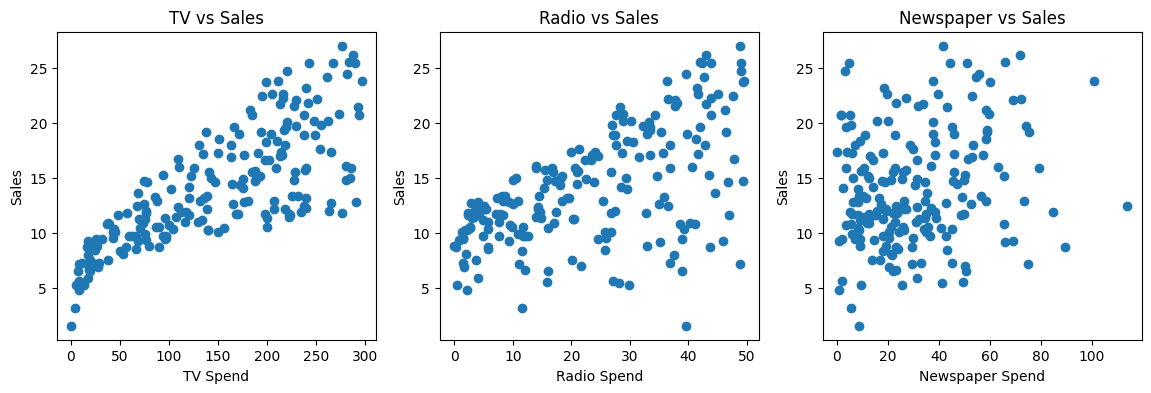

In [ ]:
# Check Scatterplot
fig,axes = plt.subplots(ncols=3,nrows=1,figsize=(14,4))

axes[0].plot(df['TV'],df['Sales'],'o')
axes[0].set_xlabel("TV Spend")
axes[0].set_ylabel("Sales")
axes[0].set_title("TV vs Sales")

axes[1].plot(df['Radio'],df['Sales'], 'o')
axes[1].set_xlabel("Radio Spend")
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio vs Sales")

axes[2].plot(df['Newspaper'],df['Sales'],'o')
axes[2].set_xlabel("Newspaper Spend")
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper vs Sales")
plt.tight_layout;

Scatterplot adalah jenis grafik yang biasa digunakan untuk menampilkan hubungan antara dua variabel numerik. Untuk TV dan Radio kita bisa melihat bahwa ada korelasi yang bisa disebut cukup positif dengan Sales. Sedangkan untuk Newspaper dengan Sales memiliki korelasi yang random.

### Split Data

In [ ]:
X = df.drop(['Date','Sales'],axis=1)
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y = df['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
len(X_train)

140

In [ ]:
len(y_test)

60

### Import and Create Model
1. Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
test_predictions = model.predict(X_test)
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

### Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
# Check Mean
y_test.mean()

13.348333333333333

<Axes: xlabel='Sales', ylabel='Count'>

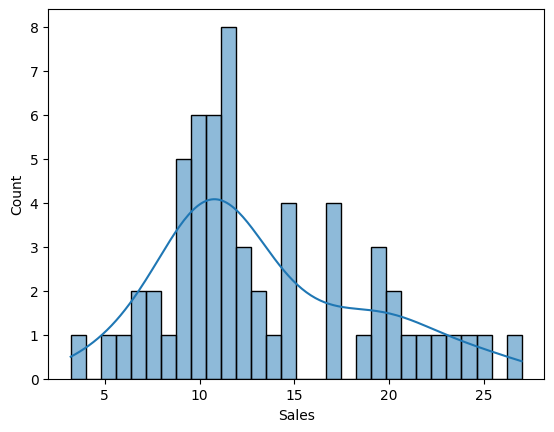

In [ ]:
# Check Histogram
sns.histplot(data=y_test,bins=30,kde=True)

In [ ]:
mean_absolute_error(y_test,test_predictions)

1.213745773614481

In [ ]:
mse = mean_squared_error(y_test,test_predictions)
rmse = np.sqrt(mse)
rmse

1.5161519375993884

Dengan nilai MAE 1.213745773614481 dan RMSE 1.5161519375993884 kita perlu mengecek :

**Relative MAE**

Relative MAE adalah ukuran kesalahan prediksi yang dinyatakan sebagai persentase dari nilai rata-rata aktual. Ini memberikan gambaran tentang seberapa besar kesalahan prediksi relatif terhadap skala data.

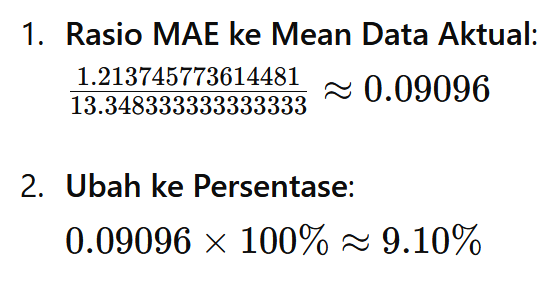

Interpretasi:

*   Relative MAE sebesar 9.10% berarti bahwa rata-rata kesalahan prediksi adalah sekitar 9.10% dari nilai rata-rata sales
*   Kesalahan 9.10% dari rata-rata sales dapat dianggap kecil atau besar tergantung pada konteks bisnis dan toleransi kesalahan yang dapat diterima
*   Jika bagi Perusahaan, kesalahan sekitar 8-10% dianggap wajar, maka MAE sebesar 1.213745773614481 menunjukkan performa model yang cukup baik. Namun, jika Perusahaan membutuhkan prediksi yang sangat akurat dengan kesalahan minimal, maka 9.10% perlu ditingkatkan


**Relative RMSE**

Sama seperti relative MAE, relative RMSE adalah ukuran kesalahan prediksi yang dinyatakan sebagai persentase dari nilai rata-rata aktual. Ini memberikan gambaran tentang seberapa besar kesalahan prediksi relatif terhadap skala data.

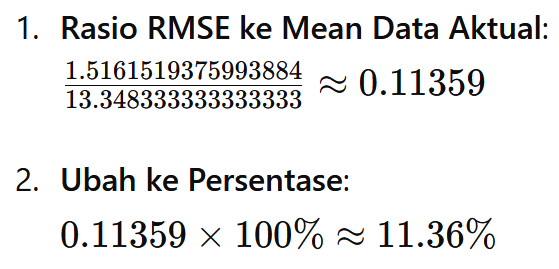

Interpretasi:

*   Relative RMSE sebesar 11.36% berarti bahwa rata-rata kesalahan prediksi (diukur dengan RMSE) adalah sekitar 11.36% dari nilai rata-rata sales
*   Kesalahan 11.36% dari rata-rata sales dapat dianggap kecil atau besar tergantung pada konteks bisnis dan toleransi kesalahan yang dapat diterima
*   Jika bagi Perusahaan, kesalahan di atas 10% dianggap wajar, maka RMSE sebesar 1.5161519375993884 menunjukkan performa model yang cukup baik. Namun, jika Perusahaan membutuhkan prediksi yang sangat akurat dengan kesalahan minimal, maka 11.36% perlu ditingkatkan.


**Campaign Prediction**

In [ ]:
# Campaign : 149 TV, 22 Radio and 12 Newspaper
# Sales?
campaign = [[149,22,12]]

In [ ]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [ ]:
model.predict(campaign)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.93380216])

Dengan campaign : 149 TV, 22 Radio dan 12 Newspaper diprediksi menghasilkan sales sebesar 13.93380216

### Import and Create Model

2. Polynomial Linear Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Choose the Degree for Polynomial Linear Regression
# Training error per degree
train_rmse_errors = []
# Test error per degree
test_rmse_errors = []

for d in range(1,10):
  # Create Poly data set for degree "d"
  polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
  poly_features = polynomial_converter.fit_transform(X)

  # Split this new poly data set
  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=101)

  # Train on this new poly set
  model = LinearRegression(fit_intercept=True)
  model.fit(X_train,y_train)

  # Predict on both train and test
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  # Calculate Errors
  # Error on Train set
  train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
  # Error on Test set
  test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

  # Append error to lists for plotting latter
  train_rmse_errors.append(train_rmse)
  test_rmse_errors.append(test_rmse)

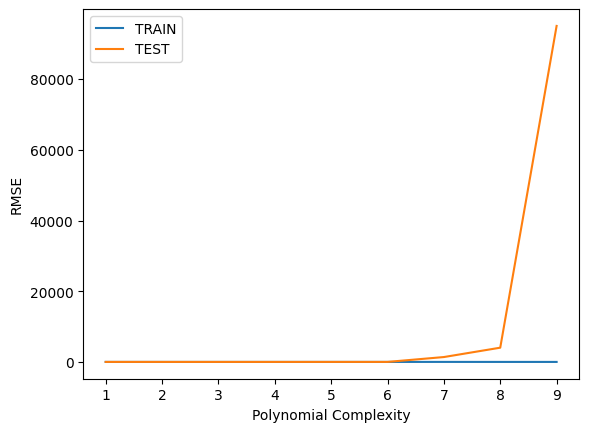

In [ ]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

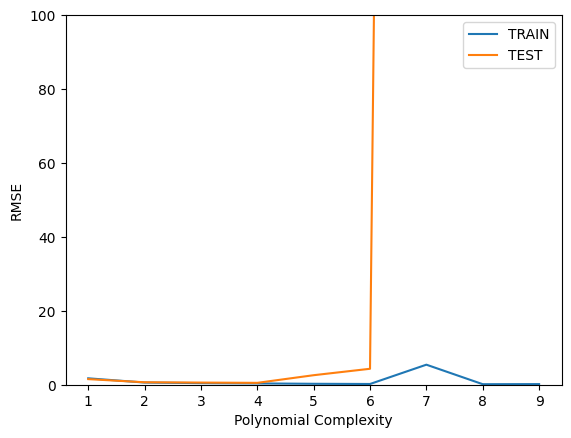

In [ ]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

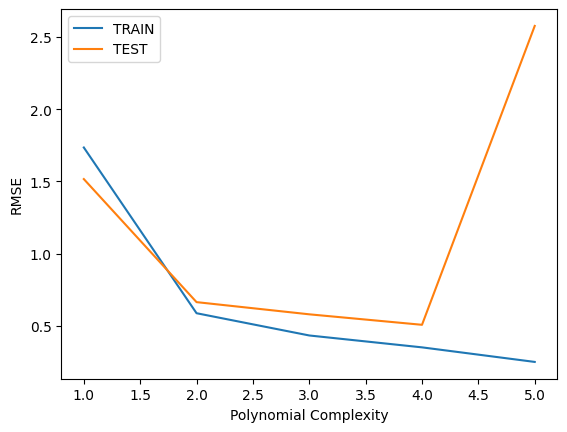

In [ ]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

Bisa dilihat dari polt diatas bahwa degree terbaik (terendah) berada di degree 2 dan 3

**Degree = 2**

In [ ]:
X = df.drop(['Date','Sales'],axis=1)
y = df['Sales']

In [ ]:
# Set degree=2
polynomial_converter_2 = PolynomialFeatures(degree=2,include_bias=False)
polynomial_converter_2

PolynomialFeatures(include_bias=False)

In [ ]:
full_converted_2 = polynomial_converter_2.fit_transform(X)
full_converted_2

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [ ]:
full_converted_2[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [ ]:
poly_model = LinearRegression()
poly_model

LinearRegression()

In [ ]:
poly_model.fit(full_converted_2,y)

LinearRegression()

In [ ]:
test_predictions_2 = poly_model.predict(full_converted_2)
test_predictions_2

array([21.75653244, 10.49006203,  8.75953072, 18.60895946, 13.25055976,
        8.15115465, 10.75890441, 12.80519827,  5.5922687 , 11.61838919,
        8.68179159, 17.37976678,  8.67815936, 10.08642683, 19.33310101,
       22.68643108, 12.67922006, 24.1486293 , 10.28415525, 14.81713812,
       18.48220076, 12.53729122,  6.74897747, 15.76467294,  9.12500081,
       12.08518549, 15.60426147, 15.92255869, 19.20659542, 10.02255592,
       20.49479569, 12.23050394,  9.35019625, 17.4012628 ,  9.22124117,
       12.18499002, 25.10682987, 14.09476449,  9.28655267, 21.61294763,
       16.5590721 , 18.23261246, 20.44445003, 13.14115942,  8.00361731,
       15.68717027, 10.18084631, 23.22677131, 15.40826561,  9.36935981,
       11.72326053, 10.45414681, 22.21014243, 21.57696171, 20.10534626,
       23.35052372,  6.75115377, 13.46202822, 24.04467393, 18.68538207,
        7.79925047, 24.48206229, 15.55073576, 13.35421087, 17.41847322,
        9.04550611,  8.06217513, 12.73184831, 19.02762624, 22.81

Evaluation Metrics

In [ ]:
mean_absolute_error(y,test_predictions_2)

0.418382611942965

In [ ]:
rmse_2 = np.sqrt(mean_squared_error(y,test_predictions_2))
rmse_2

0.6045675916073581

**Degree = 3**

In [ ]:
# Set degree=3
polynomial_converter_3 = PolynomialFeatures(degree=3,include_bias=False)

In [ ]:
full_converted_3 = polynomial_converter_3.fit_transform(X)
full_converted_3

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, ...,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05],
       [4.45000000e+01, 3.93000000e+01, 4.51000000e+01, ...,
        6.96564990e+04, 7.99365930e+04, 9.17338510e+04],
       [1.72000000e+01, 4.59000000e+01, 6.93000000e+01, ...,
        1.46001933e+05, 2.20434291e+05, 3.32812557e+05],
       ...,
       [1.77000000e+02, 9.30000000e+00, 6.40000000e+00, ...,
        5.53536000e+02, 3.80928000e+02, 2.62144000e+02],
       [2.83600000e+02, 4.20000000e+01, 6.62000000e+01, ...,
        1.16776800e+05, 1.84062480e+05, 2.90117528e+05],
       [2.32100000e+02, 8.60000000e+00, 8.70000000e+00, ...,
        6.43452000e+02, 6.50934000e+02, 6.58503000e+02]])

In [ ]:
full_converted_3[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [ ]:
poly_model.fit(full_converted_3,y)

LinearRegression()

In [ ]:
test_predictions_3 = poly_model.predict(full_converted_3)
test_predictions_3

array([21.25112435, 10.76944735,  8.59682537, 18.59722382, 12.92558288,
        7.77865309, 11.18644501, 13.18146173,  4.7981995 , 11.13217917,
        9.00639182, 17.08711182,  8.70526428, 10.41256638, 18.9205079 ,
       22.36128314, 12.44879662, 24.54599668, 10.77544525, 14.94028192,
       18.05440055, 12.28790825,  6.55734691, 15.41824699,  9.50922543,
       12.27172543, 15.88914464, 15.6599725 , 18.9921794 , 10.49158669,
       21.45284941, 12.54024178,  9.5729147 , 17.42616748,  9.39835007,
       13.07160232, 25.17126112, 14.66604832,  9.55679225, 21.23451218,
       16.18204308, 18.02572281, 21.12198507, 12.72221257,  7.9898971 ,
       15.47092435, 10.56801406, 22.95525549, 15.1405429 ,  9.79793406,
       11.3301264 , 10.82862161, 21.81398801, 21.2989098 , 20.0680429 ,
       22.97991215,  6.20415403, 13.65531944, 23.7339794 , 18.4148794 ,
        7.98297683, 24.36915977, 15.3074978 , 13.99163963, 17.80801737,
        9.44562549,  8.09070088, 12.85945623, 18.73787069, 22.49

In [ ]:
df['predictions'] = poly_model.predict(full_converted_3)
df

,Date,TV,Radio,Newspaper,Sales,predictions
0,1/1/2015,230.1,37.8,69.2,22.1,21.251124
1,1/8/2015,44.5,39.3,45.1,10.4,10.769447
2,1/15/2015,17.2,45.9,69.3,9.3,8.596825
3,1/22/2015,151.5,41.3,58.5,18.5,18.597224
4,1/29/2015,180.8,10.8,58.4,12.9,12.925583
...,...,...,...,...,...,...
195,9/27/2018,38.2,3.7,13.8,7.6,7.211551
196,10/4/2018,94.2,4.9,8.1,9.7,9.892348
197,10/11/2018,177.0,9.3,6.4,12.8,12.502784
198,10/18/2018,283.6,42.0,66.2,25.5,25.489001


Evaluation Metrics

In [ ]:
mean_absolute_error(y,test_predictions_3)

0.31356709476993133

In [ ]:
mse_3 = mean_squared_error(y,test_predictions_3)
rmse_3 = np.sqrt(mse_3)
rmse_3

0.4632953747472162

In [ ]:
y.mean()

14.0225

Dari hasil evaluation metrics kedua model, degree=3 adalah yang terbaik

Dengan nilai MAE 0.31356709476993133 dan RMSE 0.4632953747472162 kita perlu mengecek :

**Relative MAE**

Relative MAE adalah ukuran kesalahan prediksi yang dinyatakan sebagai persentase dari nilai rata-rata aktual. Ini memberikan gambaran tentang seberapa besar kesalahan prediksi relatif terhadap skala data.

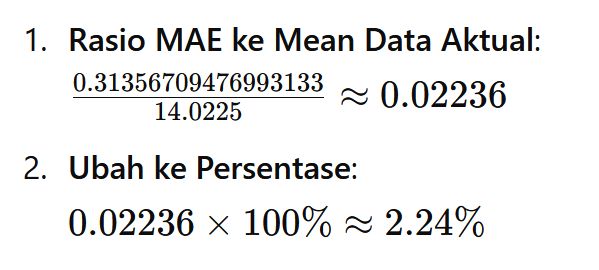

Interpretasi:

*   Relative MAE sebesar 2.24% berarti bahwa rata-rata kesalahan prediksi adalah sekitar 2.24% dari nilai rata-rata sales
*   Kesalahan 2.24% dari rata-rata sales dapat dianggap bagus atau bahkan sangat bagus tergantung pada konteks bisnis dan toleransi kesalahan yang dapat diterima
*   Jika bagi Perusahaan, kesalahan < 3% dianggap bagus, maka MAE sebesar 0.31356709476993133 menunjukkan performa model yang baik. Jika bisnis membutuhkan prediksi yang sangat akurat dengan kesalahan minimal, maka 2.24% adalah nilai yang sangat bagus


**Relative RMSE**

Sama seperti relative MAE, relative RMSE adalah ukuran kesalahan prediksi yang dinyatakan sebagai persentase dari nilai rata-rata aktual. Ini memberikan gambaran tentang seberapa besar kesalahan prediksi relatif terhadap skala data.

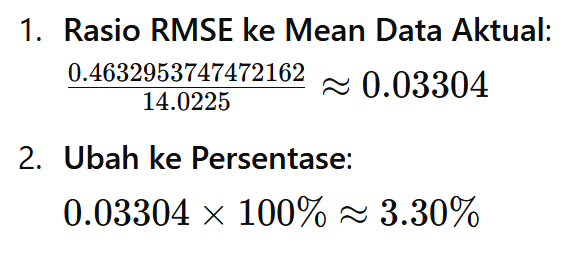

Interpretasi:

*   Relative RMSE sebesar 3.30% berarti bahwa rata-rata kesalahan prediksi (diukur dengan RMSE) adalah sekitar 3.30% dari nilai rata-rata sales
*   Kesalahan 3.30% dari rata-rata sales dapat dianggap bagus atau bahkan sangat bagus tergantung pada konteks bisnis dan toleransi kesalahan yang dapat diterima
*   Jika bagi Perusahaan, kesalahan < 4% dianggap bagus, maka RMSE sebesar 0.4632953747472162 menunjukkan performa model yang baik. Jika bisnis membutuhkan prediksi yang sangat akurat dengan kesalahan minimal, maka 3.30% adalah nilai yang bagus.

### Save and Load Model

In [ ]:
from joblib import dump,load

In [ ]:
dump(polynomial_converter_3,'polynomial_converter.joblib')

['polynomial_converter.joblib']

In [ ]:
dump(poly_model,'poly_model.joblib')

['poly_model.joblib']

In [ ]:
loaded_converter = load('polynomial_converter.joblib')

In [ ]:
load_model = load('poly_model.joblib')